In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

## Merging all files into a single CSV file

In [2]:
files = [file for file in os.listdir('./Sales_Data')]
all_months_data = pd.DataFrame()
for file in files:
    df = pd.read_csv('./Sales_Data/'+file)
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.to_csv('all_data.csv', index=False)

### Reading the file in updated dataframe

In [3]:
all_data = pd.read_csv('all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


# Data Cleaning

### Deleting NaN values

In [4]:
all_data = all_data.dropna(how='all')
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


### Deleting 'Or' values

In [6]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


## Convert Columns to their respctive datatypes

In [10]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) # To Int
all_data['Price Each'] = pd.to_numeric(all_data['Price Each']) # To Float

all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  int32  
dtypes: float64(1), int32(1), int64(1), object(4)
memory usage: 10.6+ MB


In [34]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

C:\Users\wasee\AppData\Local\Temp\ipykernel_14820\3842191188.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])


In [35]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   Month             185950 non-null  int32         
 7   Sales             185950 non-null  float64       
 8   City              185950 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(4)
memory usage: 17.5+ MB


# Adding Columns

### 1. Adding Month Column

In [7]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### 2. Adding Sales Column

In [12]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### 3. Adding City Column

In [24]:
# Using .apply method to get the city form the data
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}, ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas, (TX)"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston, (MA)"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, (CA)"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles, (CA)"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles, (CA)"


### 3. Adding Hour Column

In [36]:
all_data['Hour'] = all_data['Order Date'].dt.hour

### 4. Adding Minute Column

In [37]:
all_data['Minute'] = all_data['Order Date'].dt.minute

### 5. Adding Grouped Column

In [45]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df = df[['Order ID', 'Grouped']].drop_duplicates()
df.head()

C:\Users\wasee\AppData\Local\Temp\ipykernel_14820\3892263634.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [38]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas, (TX)",8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston, (MA)",22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, (CA)",14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles, (CA)",14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles, (CA)",9,27


# Questions and Solutions:

### Question 1: What was the best month for sales? How much was earned that month?

In [21]:
month = all_data.groupby('Month').sum()
month.loc[:,['Quantity Ordered', 'Price Each', 'Sales']]

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


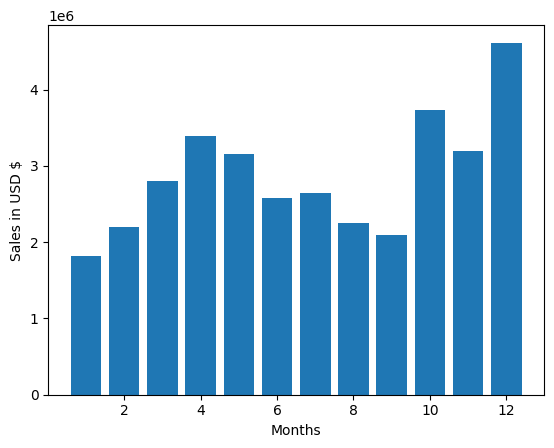

In [23]:
months = range(1,13)
plt.bar(months, month['Sales'])
plt.xlabel('Months')
plt.ylabel('Sales in USD $')

plt.show()

### Question 2: Which City had the highest number of sales?

In [25]:
results = all_data.groupby('City').sum()
results.loc[:,['Quantity Ordered', 'Price Each', 'Sales']]

,Quantity Ordered,Price Each,Sales
City,,,
"Atlanta, (GA)",16602,2779908.20,2795498.58
"Austin, (TX)",11153,1809873.61,1819581.75
"Boston, (MA)",22528,3637409.77,3661642.01
"Dallas, (TX)",16730,2752627.82,2767975.40
"Los Angeles, (CA)",33289,5421435.23,5452570.80
"New York City, (NY)",27932,4635370.83,4664317.43
"Portland, (ME)",2750,447189.25,449758.27
"Portland, (OR)",11303,1860558.22,1870732.34
"San Francisco, (CA)",50239,8211461.74,8262203.91


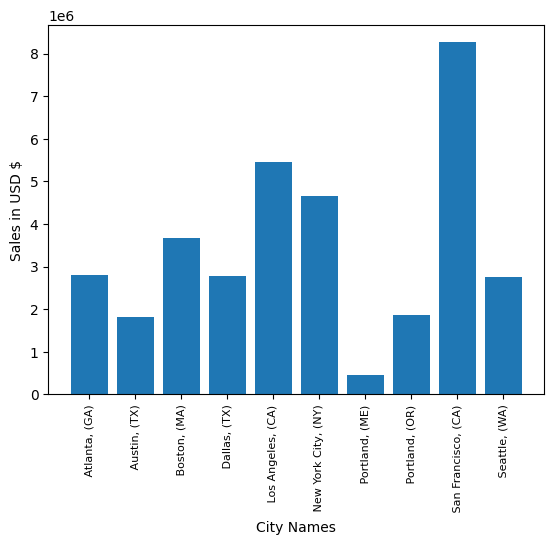

In [33]:
cities = [city for city, df in all_data.groupby('City')]

plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.xlabel('City Names')
plt.ylabel('Sales in USD $')

plt.show()

### Question 3: At what time should we display advertisements to maximize the sales of our products?

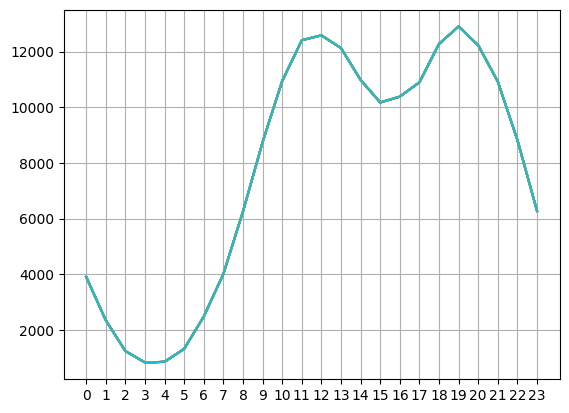

In [40]:
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.grid()

plt.show()

# Recommend to display advertisements on 11am (11) or 7pm(19) to gain more customers:

### Question 4: What products are sold together most often?

In [46]:
from itertools import combinations
from collections import Counter

# For 2 pairs:

count = Counter()

for row  in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
for key, value in count.most_common(15):
    print(key, [value])

('iPhone', 'Lightning Charging Cable') [1005]
('Google Phone', 'USB-C Charging Cable') [987]
('iPhone', 'Wired Headphones') [447]
('Google Phone', 'Wired Headphones') [414]
('Vareebadd Phone', 'USB-C Charging Cable') [361]
('iPhone', 'Apple Airpods Headphones') [360]
('Google Phone', 'Bose SoundSport Headphones') [220]
('USB-C Charging Cable', 'Wired Headphones') [160]
('Vareebadd Phone', 'Wired Headphones') [143]
('Lightning Charging Cable', 'Wired Headphones') [92]
('Lightning Charging Cable', 'Apple Airpods Headphones') [81]
('Vareebadd Phone', 'Bose SoundSport Headphones') [80]
('USB-C Charging Cable', 'Bose SoundSport Headphones') [77]
('Apple Airpods Headphones', 'Wired Headphones') [69]
('Lightning Charging Cable', 'USB-C Charging Cable') [58]


In [47]:
# For 3 pairs:

count = Counter()

for row  in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 3)))
    
for key, value in count.most_common(15):
    print(key, [value])

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') [87]
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') [62]
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') [47]
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') [35]
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') [33]
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') [27]
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') [24]
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') [16]
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') [5]
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') [5]
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') [4]
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') [3]
('iPhone', 'Lightning Charging Cable', 'Lightning Charging Cable') [3]
('iPhone', 'Lightning Charging Cable', 'AA Batteries (4-pack)') 

### Question 5: What product sold the most? And Why was it sold?

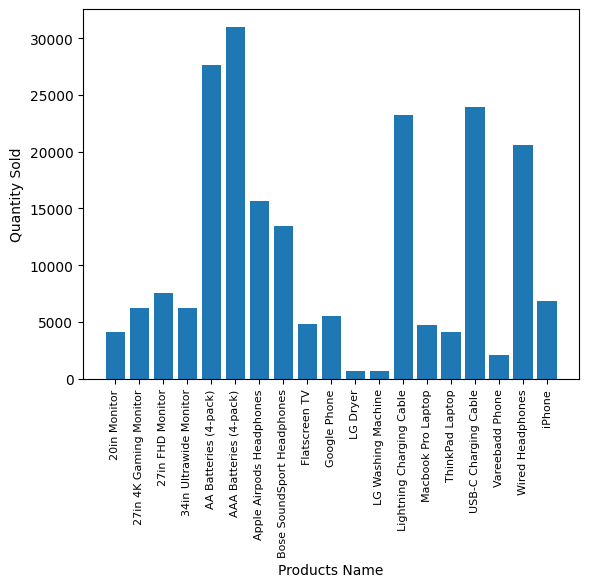

In [57]:
product_group = all_data.groupby(['Product'])[['Quantity Ordered', 'Price Each', 'Sales']]
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.xticks(products, rotation='vertical', size=8)
plt.xlabel('Products Name')
plt.ylabel('Quantity Sold')
plt.show()

C:\Users\wasee\AppData\Local\Temp\ipykernel_14820\976742740.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  ax2.plot(products, qu_ordered, 'b-', color='g')
C:\Users\wasee\AppData\Local\Temp\ipykernel_14820\976742740.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)


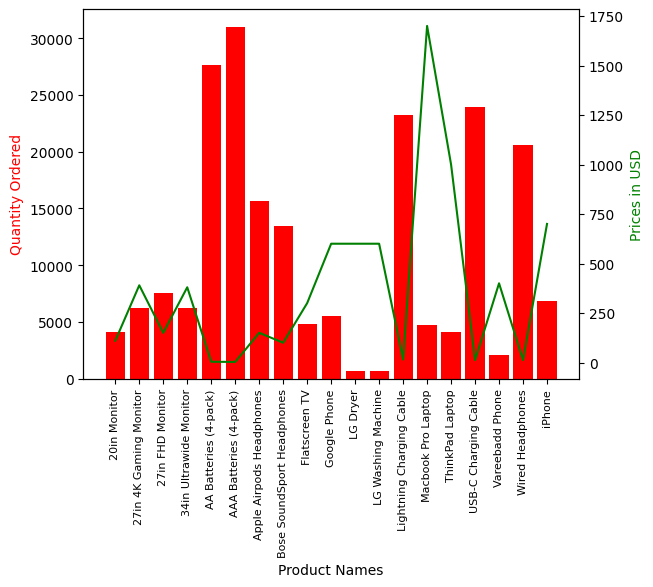

In [93]:
price_group = all_data.groupby(['Product'])[['Quantity Ordered', 'Price Each', 'Sales']]
qu_ordered = price_group.mean()['Price Each']
prices = [product for product, df in price_group]

product_group = all_data.groupby(['Product'])[['Quantity Ordered', 'Price Each', 'Sales']]
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]

fig,ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='r')
ax2.plot(products, qu_ordered, 'b-', color='g')

ax1.set_xlabel('Product Names')
ax1.set_ylabel('Quantity Ordered', color='r')
ax2.set_ylabel('Prices in USD', color='g')
ax1.set_xticklabels(products, rotation='vertical', size=8)

plt.show()